# Setup and Preprocessing

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [ ]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

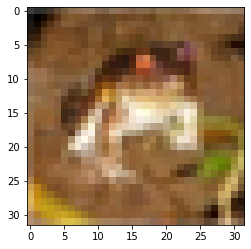

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

array([6], dtype=uint8)

# Building the CNN

In [ ]:
# Define the Object
model = tf.keras.models.Sequential()

In [ ]:
#Adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu', input_shape =[32,32,3]))

In [ ]:
#Adding second layer and maxpool layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Training the Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs = 10)

Epoch 1/10
5000/5000 [==============================] - 227s 45ms/step - loss: 1.4071 - sparse_categorical_accuracy: 0.4907
Epoch 2/10
5000/5000 [==============================] - 224s 45ms/step - loss: 1.0248 - sparse_categorical_accuracy: 0.6371
Epoch 3/10
5000/5000 [==============================] - 231s 46ms/step - loss: 0.8834 - sparse_categorical_accuracy: 0.6860
Epoch 4/10
5000/5000 [==============================] - 234s 47ms/step - loss: 0.7953 - sparse_categorical_accuracy: 0.7186
Epoch 5/10
5000/5000 [==============================] - 232s 46ms/step - loss: 0.7308 - sparse_categorical_accuracy: 0.7400
Epoch 6/10
5000/5000 [==============================] - 231s 46ms/step - loss: 0.6813 - sparse_categorical_accuracy: 0.7594
Epoch 7/10
5000/5000 [==============================] - 233s 47ms/step - loss: 0.6326 - sparse_categorical_accuracy: 0.7757
Epoch 8/10
5000/5000 [==============================] - 233s 47ms/step - loss: 0.6003 - sparse_categorical_accuracy: 0.7871
Epoch 9/

# Make predictions

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 11s 33ms/step - loss: 0.7688 - sparse_categorical_accuracy: 0.7477


In [ ]:
print(test_acc)

0.7476999759674072


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 12s 35ms/step


In [ ]:
print(y_pred[1]), print(y_test[1])

8
[8]


(None, None)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[761  19  47  25  29   8  11  12  47  41]
 [  8 876   1   4   1   1   2   3  16  88]
 [ 56   9 588  51 103  73  60  40  10  10]
 [ 13  11  54 491  62 215  54  63  13  24]
 [ 10   4  25  53 658  23  59 156   7   5]
 [ 10   1  31 114  34 689  16  85   5  15]
 [  6   8  30  55  42  32 803  12   2  10]
 [ 10   0  16  26  29  40   4 857   2  16]
 [ 38  23  10  10  10   4   3   7 862  33]
 [ 16  41   3  10   1   2   1  10  24 892]]


In [ ]:
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)